In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_votacao = pd.read_parquet('data/votacao.parquet.gzip')
sns.set_style('darkgrid')

In [3]:
df_votacao.groupby('NM_VOTAVEL').agg(votos=('QT_VOTOS', 'sum'))

,votos
NM_VOTAVEL,
JAIR MESSIAS BOLSONARO,58206354
LUIZ INÁCIO LULA DA SILVA,60345999
VOTO BRANCO,1769678
VOTO NULO,3930765


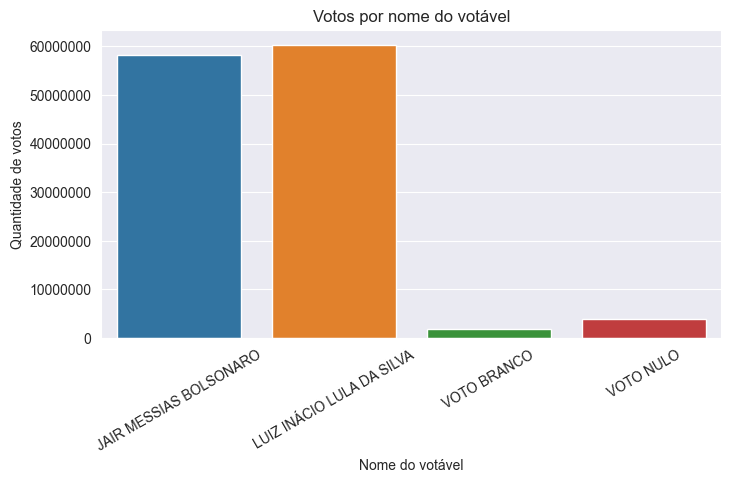

In [4]:
fig, ax = plt.subplots(figsize=(8,4))

sns.barplot(
    data=df_votacao.groupby('NM_VOTAVEL').agg(votos=('QT_VOTOS', 'sum')).reset_index(),
    x='NM_VOTAVEL',
    y='votos',
    ax=ax
)

ax.set(xlabel="Nome do votável", ylabel="Quantidade de votos")

plt.xticks(rotation=30)
plt.ticklabel_format(style='plain', axis='y')
plt.title("Votos por nome do votável")
plt.show()

In [5]:
df_votacao.groupby(['DS_MODELO_URNA', 'NM_VOTAVEL']).agg(votos=('QT_VOTOS', 'sum'))

votos
DS_MODELO_URNA NM_VOTAVEL                         
2009.0         JAIR MESSIAS BOLSONARO      5722585
               LUIZ INÁCIO LULA DA SILVA   5963745
               VOTO BRANCO                  164686
               VOTO NULO                    352474
2010.0         JAIR MESSIAS BOLSONARO     10379355
               LUIZ INÁCIO LULA DA SILVA  12070380
               VOTO BRANCO                  322077
               VOTO NULO                    737513
2011.0         JAIR MESSIAS BOLSONARO      2943287
               LUIZ INÁCIO LULA DA SILVA   3432852
               VOTO BRANCO                   94646
               VOTO NULO                    209124
2013.0         JAIR MESSIAS BOLSONARO      2857302
               LUIZ INÁCIO LULA DA SILVA   3001068
               VOTO BRANCO                   81763
               VOTO NULO                    188382
2015.0         JAIR MESSIAS BOLSONARO     10114104
               LUIZ INÁCIO LULA DA SILVA  10766404
               VOTO BRANCO                  309619
               VOTO NULO                    690191
2020.0         JAIR MESSIAS BOLSONARO     26189721
               LUIZ INÁCIO LULA DA SILVA  25111550
               VOTO BRANCO                  796887
               VOTO NULO                   1753081

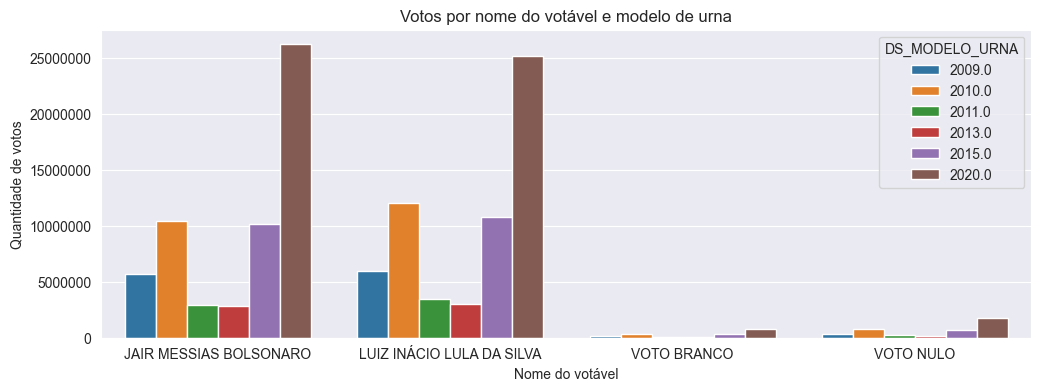

In [6]:
fig, ax = plt.subplots(figsize=(12,4))
sns.barplot(
    data=df_votacao.groupby(['DS_MODELO_URNA', 'NM_VOTAVEL']).agg(votos=('QT_VOTOS', 'sum')).reset_index(),
    x='NM_VOTAVEL',
    y='votos',
    hue='DS_MODELO_URNA',
    ax=ax
)

ax.set(xlabel="Nome do votável", ylabel="Quantidade de votos")
plt.ticklabel_format(style='plain', axis='y')
plt.title("Votos por nome do votável e modelo de urna")
plt.show()

In [7]:
df_votacao.groupby(['DS_MODELO_URNA', 'NM_VOTAVEL']) \
    .agg(votos_porcento=('QT_VOTOS', 'sum')) \
    .groupby(level=0, group_keys=False) \
    .apply(lambda x: 100*x/float(x.sum()))

votos_porcento
DS_MODELO_URNA NM_VOTAVEL                               
2009.0         JAIR MESSIAS BOLSONARO          46.893020
               LUIZ INÁCIO LULA DA SILVA       48.869176
               VOTO BRANCO                      1.349499
               VOTO NULO                        2.888305
2010.0         JAIR MESSIAS BOLSONARO          44.149949
               LUIZ INÁCIO LULA DA SILVA       51.342946
               VOTO BRANCO                      1.369997
               VOTO NULO                        3.137108
2011.0         JAIR MESSIAS BOLSONARO          44.061783
               LUIZ INÁCIO LULA DA SILVA       51.390700
               VOTO BRANCO                      1.416876
               VOTO NULO                        3.130641
2013.0         JAIR MESSIAS BOLSONARO          46.623073
               LUIZ INÁCIO LULA DA SILVA       48.968926
               VOTO BRANCO                      1.334140
               VOTO NULO                        3.073860
2015.0         JAIR MESSIAS BOLSONARO          46.224666
               LUIZ INÁCIO LULA DA SILVA       49.205884
               VOTO BRANCO                      1.415057
               VOTO NULO                        3.154392
2020.0         JAIR MESSIAS BOLSONARO          48.633460
               LUIZ INÁCIO LULA DA SILVA       46.631332
               VOTO BRANCO                      1.479793
               VOTO NULO                        3.255414

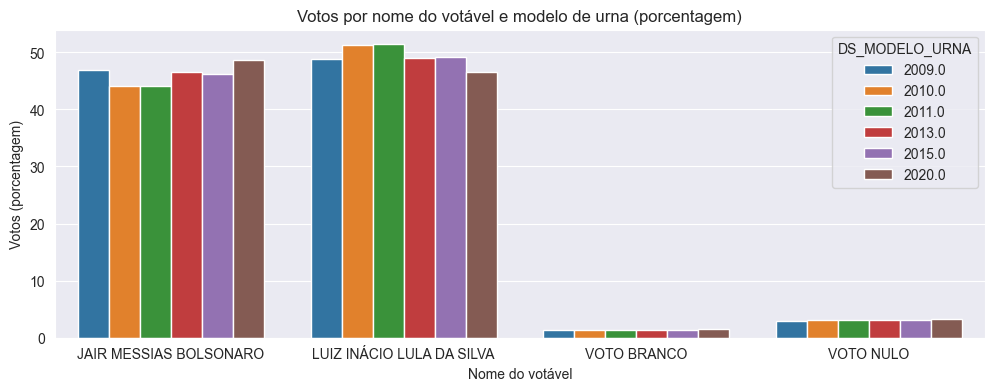

In [8]:
fig, ax = plt.subplots(figsize=(12,4))
sns.barplot(
    data=df_votacao.groupby(['DS_MODELO_URNA', 'NM_VOTAVEL']) \
        .agg(votos_porcento=('QT_VOTOS', 'sum')) \
        .groupby(level=0, group_keys=False) \
        .apply(lambda x: 100*x/float(x.sum())) \
        .reset_index(),
    x='NM_VOTAVEL',
    y='votos_porcento',
    hue='DS_MODELO_URNA',
    ax=ax
)

ax.set(xlabel="Nome do votável", ylabel="Votos (porcentagem)")
plt.ticklabel_format(style='plain', axis='y')

plt.title("Votos por nome do votável e modelo de urna (porcentagem)")
plt.show()

In [9]:
df_votacao.groupby(['DS_MODELO_URNA', 'NM_VOTAVEL']) \
    .agg(votos_porcento=('QT_VOTOS', 'sum')) \
    .groupby(level=0, group_keys=False) \
    .apply(lambda x: 100*x/float(x.sum())) \
    .reset_index() \
    .pivot_table(index='DS_MODELO_URNA', columns='NM_VOTAVEL', values='votos_porcento', margins=True, margins_name='Total', aggfunc='sum').fillna(0)

NM_VOTAVEL,JAIR MESSIAS BOLSONARO,LUIZ INÁCIO LULA DA SILVA,VOTO BRANCO,VOTO NULO,Total
DS_MODELO_URNA,,,,,
2009.0,46.893020,48.869176,1.349499,2.888305,100.0
2010.0,44.149949,51.342946,1.369997,3.137108,100.0
2011.0,44.061783,51.390700,1.416876,3.130641,100.0
2013.0,46.623073,48.968926,1.334140,3.073860,100.0
2015.0,46.224666,49.205884,1.415057,3.154392,100.0
2020.0,48.633460,46.631332,1.479793,3.255414,100.0
Total,276.585951,296.408965,8.365362,18.639722,600.0


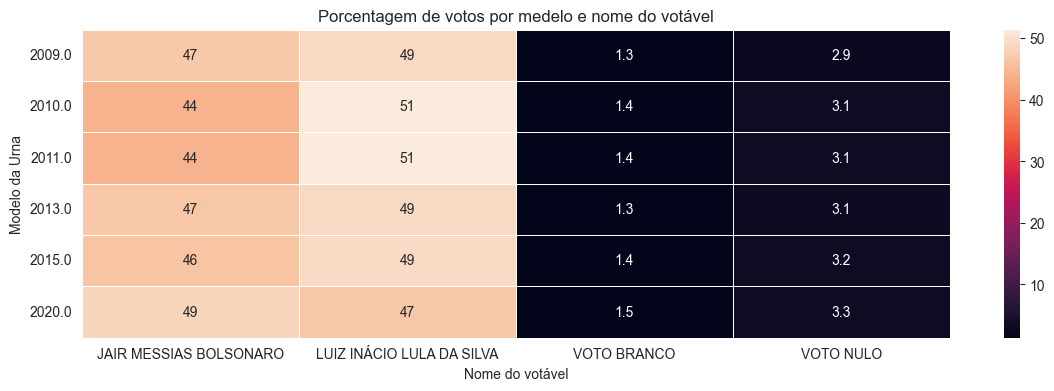

In [10]:
fig, ax = plt.subplots(figsize=(14,4))
sns.heatmap(
    data=df_votacao.groupby(['DS_MODELO_URNA', 'NM_VOTAVEL']) \
        .agg(votos_porcento=('QT_VOTOS', 'sum')) \
        .groupby(level=0, group_keys=False) \
        .apply(lambda x: 100*x/float(x.sum())) \
        .reset_index() \
        .pivot_table(index='DS_MODELO_URNA', columns='NM_VOTAVEL', values='votos_porcento') \
        .fillna(0),
    annot=True,
    linewidth=.5,
    ax=ax
)

ax.set(xlabel="Nome do votável", ylabel="Modelo da Urna")

plt.yticks(rotation=0)
plt.title("Porcentagem de votos por medelo e nome do votável")
plt.show()

In [11]:
df_votacao.groupby(['DS_DIVERGENCIA', 'NM_VOTAVEL']) \
    .agg(votos_porcento=('QT_VOTOS', 'sum')) \
    .groupby(level=0, group_keys=False) \
    .apply(lambda x: 100*x/float(x.sum())) \
    .reset_index() \
    .pivot_table(index='DS_DIVERGENCIA', columns='NM_VOTAVEL', values='votos_porcento', margins=True, margins_name='Total', aggfunc='sum') \
    .fillna(0)


NM_VOTAVEL,JAIR MESSIAS BOLSONARO,LUIZ INÁCIO LULA DA SILVA,VOTO BRANCO,VOTO NULO,Total
DS_DIVERGENCIA,,,,,
#NULO#,46.841595,48.566592,1.425591,3.166222,100.0
**,47.050719,48.597757,1.346084,3.005439,100.0
Total,93.892314,97.164350,2.771675,6.171661,200.0


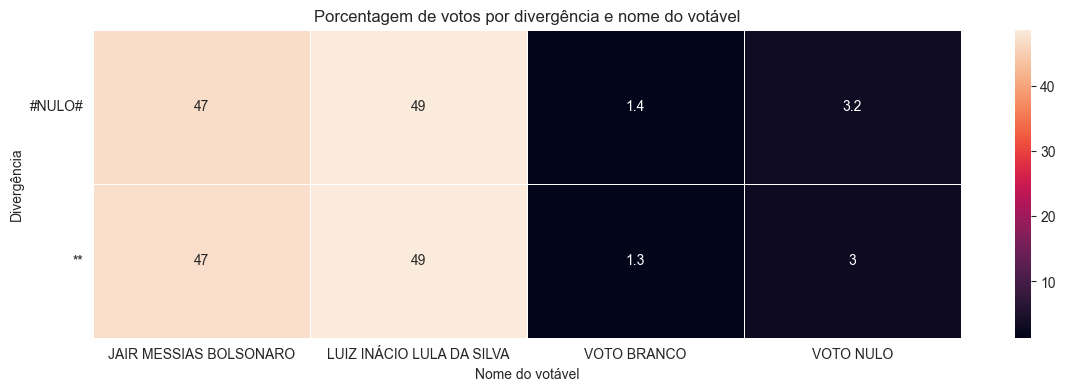

In [12]:
fig, ax = plt.subplots(figsize=(14,4))
sns.heatmap(
    data=df_votacao.groupby(['DS_DIVERGENCIA', 'NM_VOTAVEL']) \
        .agg(votos_porcento=('QT_VOTOS', 'sum')) \
        .groupby(level=0, group_keys=False) \
        .apply(lambda x: 100*x/float(x.sum())) \
        .reset_index() \
        .pivot_table(index='DS_DIVERGENCIA', columns='NM_VOTAVEL', values='votos_porcento') \
        .fillna(0),
    annot=True,
    linewidth=.5,
    ax=ax
)

ax.set(xlabel="Nome do votável", ylabel="Divergência")

plt.yticks(rotation=0)
plt.title("Porcentagem de votos por divergência e nome do votável")
plt.show()

In [13]:
df_votacao.groupby(['DS_MODELO_URNA']).agg(qtd_urnas=('NR_URNA_EFETIVADA', pd.Series.nunique))

,qtd_urnas
DS_MODELO_URNA,
2009.0,48245
2010.0,93765
2011.0,26889
2013.0,24672
2015.0,85729
2020.0,192691


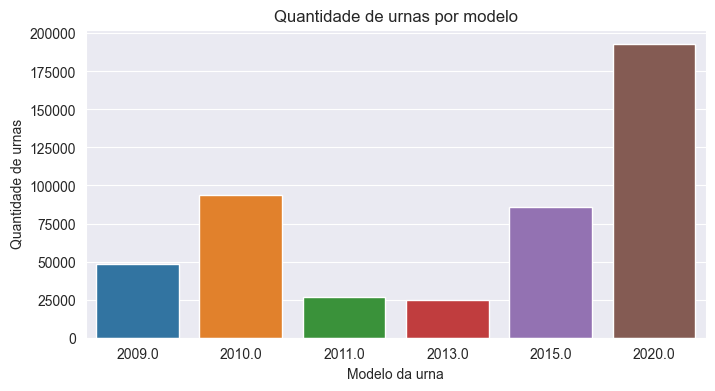

In [14]:
fig, ax = plt.subplots(figsize=(8,4))

sns.barplot(
    data=df_votacao.groupby(['DS_MODELO_URNA']).agg(qtd_urnas=('NR_URNA_EFETIVADA', pd.Series.nunique)).reset_index(),
    x='DS_MODELO_URNA',
    y='qtd_urnas',
    ax=ax
)

ax.set(xlabel="Modelo da urna", ylabel="Quantidade de urnas")

plt.ticklabel_format(style='plain', axis='y')
plt.title("Quantidade de urnas por modelo")
plt.show()

In [15]:
pd.set_option('display.max_rows', None)
df_votacao.groupby(['SG_UF', 'DS_MODELO_URNA'], as_index=False) \
    .agg(qtd_urnas=('NR_URNA_EFETIVADA', pd.Series.nunique)) \
    .pivot_table(index='SG_UF', columns='DS_MODELO_URNA', values='qtd_urnas', margins=True, margins_name='Total', aggfunc='sum').fillna(0)

DS_MODELO_URNA,2009.0,2010.0,2011.0,2013.0,2015.0,2020.0,Total
SG_UF,,,,,,,
AC,270.0,362.0,86.0,180.0,317.0,909.0,2124
AL,1273.0,1374.0,0.0,513.0,1085.0,2381.0,6626
AM,407.0,1397.0,573.0,400.0,1503.0,3173.0,7453
AP,286.0,300.0,99.0,131.0,201.0,723.0,1740
BA,4350.0,7249.0,2198.0,2074.0,5503.0,13050.0,34424
CE,3494.0,4163.0,1499.0,653.0,3422.0,9565.0,22796
DF,0.0,507.0,0.0,624.0,1685.0,3932.0,6748
ES,1663.0,1687.0,277.0,641.0,1632.0,3339.0,9239
GO,1741.0,3049.0,543.0,826.0,2251.0,6209.0,14619


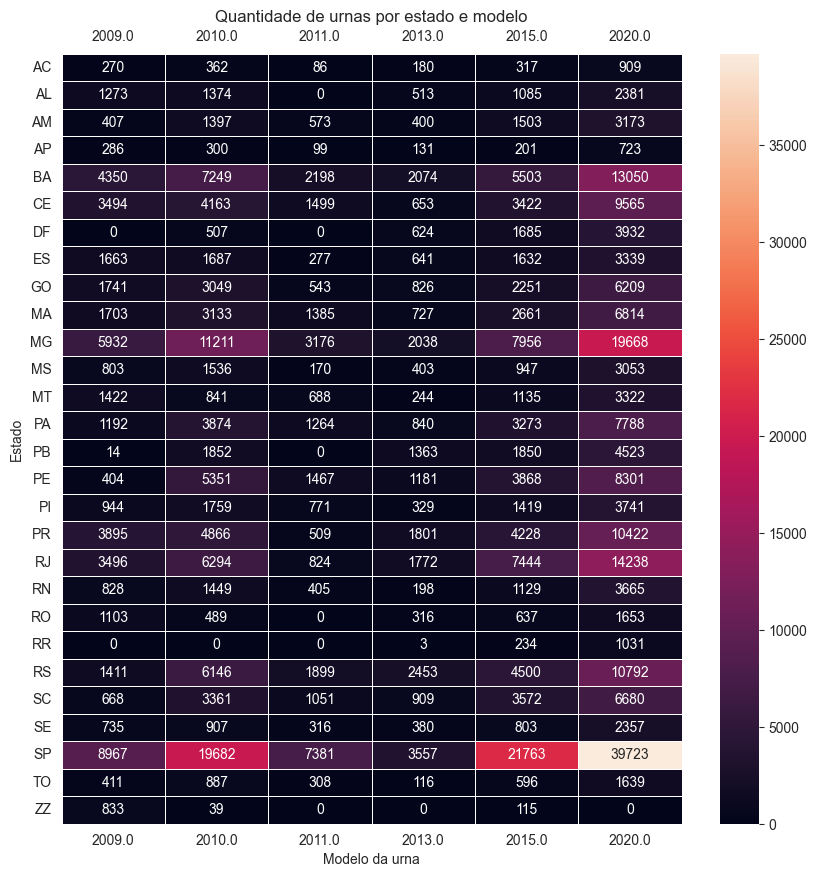

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(
    data=df_votacao.groupby(['SG_UF', 'DS_MODELO_URNA'], as_index=False) \
        .agg(qtd_urnas=('NR_URNA_EFETIVADA', pd.Series.nunique)) \
        .pivot_table(index='SG_UF', columns='DS_MODELO_URNA', values='qtd_urnas') \
        .fillna(0),
    annot=True,
    linewidth=.5,
    fmt='g',
    ax=ax
)

ax.set(xlabel="Modelo da urna", ylabel="Estado")
ax.xaxis.set_tick_params(labeltop=True)

plt.yticks(rotation=0)
plt.title("Quantidade de urnas por estado e modelo")
plt.show()

In [17]:
pivot_votacao = df_votacao[['NR_URNA_EFETIVADA', 'DS_MODELO_URNA','NM_VOTAVEL','QT_VOTOS']] \
    .pivot_table(index=['NR_URNA_EFETIVADA', 'DS_MODELO_URNA'], columns='NM_VOTAVEL', values='QT_VOTOS') \
    .fillna(0)


In [18]:
pivot_votacao['Total'] = pivot_votacao[['JAIR MESSIAS BOLSONARO', 'LUIZ INÁCIO LULA DA SILVA', 'VOTO BRANCO', 'VOTO NULO']].sum(axis=1)
pivot_votacao['JAIR MESSIAS BOLSONARO (%)'] = pivot_votacao['JAIR MESSIAS BOLSONARO'] / pivot_votacao['Total'] * 100
pivot_votacao['LUIZ INÁCIO LULA DA SILVA (%)'] = pivot_votacao['LUIZ INÁCIO LULA DA SILVA'] / pivot_votacao['Total'] * 100
pivot_votacao['VOTO BRANCO (%)'] = pivot_votacao['VOTO BRANCO'] / pivot_votacao['Total'] * 100
pivot_votacao['VOTO NULO (%)'] = pivot_votacao['VOTO NULO'] / pivot_votacao['Total'] * 100

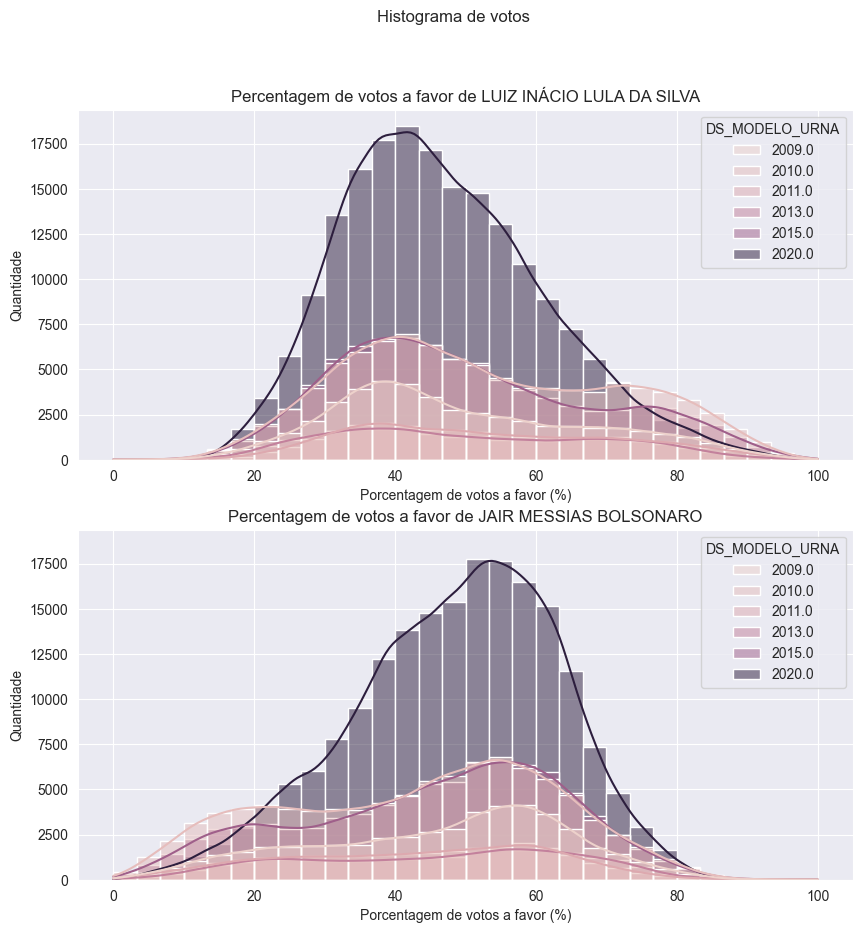

In [19]:
fig, ax = plt.subplots(figsize=(10,10), sharey=True, nrows=2)

sns.histplot(
    data=pivot_votacao.reset_index()[['DS_MODELO_URNA', 'LUIZ INÁCIO LULA DA SILVA (%)']],
    x='LUIZ INÁCIO LULA DA SILVA (%)',
    hue='DS_MODELO_URNA',
    bins=30,
    kde=True,
    ax=ax[0]
)

sns.histplot(
    data=pivot_votacao.reset_index()[['DS_MODELO_URNA', 'JAIR MESSIAS BOLSONARO (%)']],
    x='JAIR MESSIAS BOLSONARO (%)',
    hue='DS_MODELO_URNA',
    bins=30,
    kde=True,
    ax=ax[1]
)

ax[0].set(xlabel="Porcentagem de votos a favor (%)", ylabel="Quantidade")
ax[0].set_title("Percentagem de votos a favor de LUIZ INÁCIO LULA DA SILVA")
ax[1].set(xlabel="Porcentagem de votos a favor (%)", ylabel="Quantidade")
ax[1].set_title("Percentagem de votos a favor de JAIR MESSIAS BOLSONARO")

plt.yticks(rotation=0)
plt.suptitle("Histograma de votos")
plt.show()